In [38]:
# main packages
import numpy as np
import pandas as pd
import tensorflow as ts
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('merc.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [41]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [42]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

D:\programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

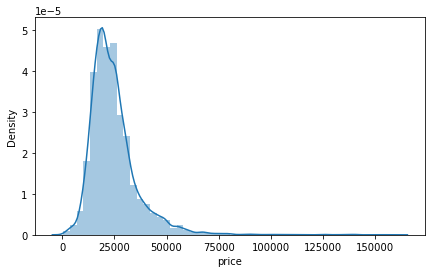

In [43]:
plt.figure(figsize=(7,4))
sns.distplot(data['price'])

D:\programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

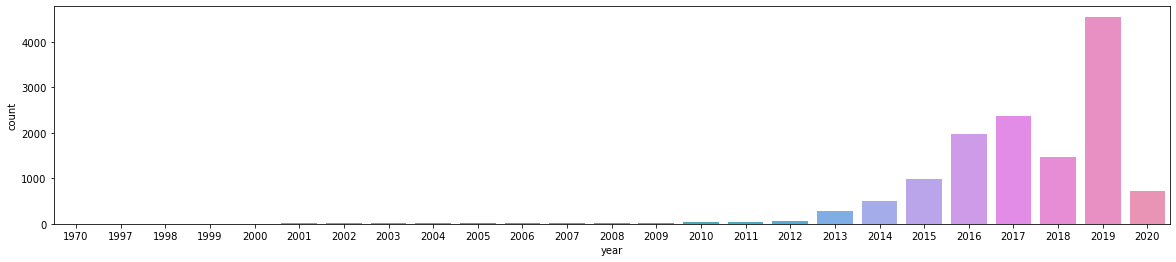

In [44]:
plt.figure(figsize=(20,4))
sns.countplot(data['year'])

In [45]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [46]:
data.corr()['price']

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

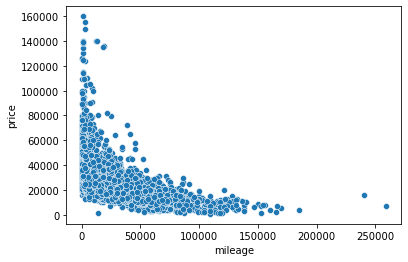

In [47]:
sns.scatterplot(x=data['mileage'],y=data['price'],data=data)

In [48]:
data.sort_values('price',ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,A Class,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,G Class,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [49]:
data_price_modified = data.sort_values('price',ascending=False).iloc[131:]

In [50]:
data_price_modified.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


D:\programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

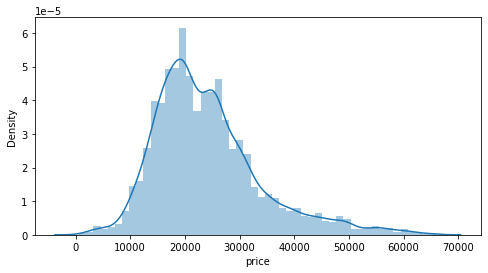

In [51]:
plt.figure(figsize=(8,4))
sns.distplot(data_price_modified['price'])

<AxesSubplot:xlabel='year', ylabel='price'>

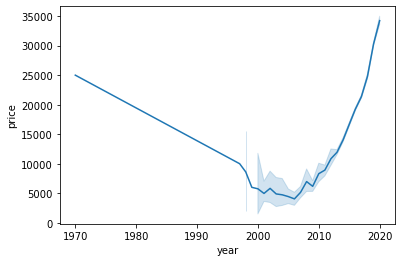

In [74]:
sns.lineplot(x=data_price_modified['year'],y=data_price_modified['price'],
             data=data_price_modified)

In [94]:
#data_price_modified = data_price_modified.drop('transmission',axis=1)
data_price_modified = data_price_modified[data_price_modified.year != 1970]

In [95]:
data_price_modified.sort_values('year').head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize
11912,SL CLASS,1997,9995,76000,Petrol,255,28.2,3.2
11860,SL CLASS,1998,10450,49000,Petrol,255,28.2,3.2
11808,SLK,1998,1990,113557,Petrol,265,32.1,2.3
11764,SLK,1998,1990,99300,Petrol,265,32.1,2.3
11794,S Class,1998,19990,43534,Petrol,265,23.3,6.0


In [96]:
# model 
Y = data_price_modified['price'].values
X = data_price_modified.drop('price',axis=1).values

In [98]:
Y


array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [101]:
from sklearn.mode

array([[' CL Class', 2016, 8008, ..., 20, 67.3, 2.1],
       [' CL Class', 2016, 6951, ..., 200, 42.8, 2.0],
       [' A Class', 2020, 4158, ..., 145, 65.7, 1.5],
       ...,
       [' C Class', 2019, 9883, ..., 145, 61.4, 2.0],
       [' C Class', 2016, 85040, ..., 0, 122.8, 2.0],
       [' C Class', 2019, 4793, ..., 145, 58.9, 1.6]], dtype=object)